# Парсинг данных

In [ ]:
from selenium import webdriver
from lib import parser

## Определение авторов ModernLib

In [ ]:
authors_modernLib = {'Чехов':'chehov_anton_pavlovich',
           'Пришвин':'prishvin_mihail_mihaylovich',
           'Драгунский':'viktor_yuzefovich_dragunskiy',
           'По':'edgar_allan_po'
          }

## Определение авторов Flibusta

In [ ]:
authors_flibusta = {'Чехов'     : '20781?wIuu4XiF',
                    'Пришвин'   : '19724?wIuu4XiF',
                    'Драгунский': '18842?wIuu4XiF',
                    'По'        : '9702?wIuu4XiF',
                    'Кинг'      : '5803?wIuu4XiF',
                    'Тургенев'  : '20081?JoHlDdk3',
                    'Куприн'    : '17815?JoHlDdk3',         
                    'Андерсен'  : '17415?JoHlDdk3',
                    'Гримм'     : '32013?JoHlDdk3',
                    'Хаям'      : '20203?JoHlDdk3',
                    'Грин'      : '4317?JoHlDdk3'
                    }


## Парсинг сайта: ModernLib

In [ ]:
driver = webdriver.Chrome('chromedriver') 

In [ ]:
#parser.get_data_modernLib(authors_modernLib,driver)
#parser.get_texts_modernLib(authors_modernLib)
#parser.place_data_in_csv_modernLib(authors_modernLib)

## Парсинг сайта: Flibusta

In [ ]:
#parser.get_data_text_flibusta(authors_flibusta)
parser.place_data_in_csv_flibusta(authors_flibusta)

# Подготовка текстов

In [ ]:
import random

In [1]:
import pandas as pd

In [ ]:
from lib import prepare_data

In [ ]:
prepare_data.train_test_data()

In [2]:
df_to_obfuscate = pd.read_csv('D:\\AuthorObfuscation\\testdata\\authors_data_flibusta.csv', delimiter=',')
to_obfuscate = list(df_to_obfuscate['text'])
authors = list(df_to_obfuscate['author'])

# Обфускация текстов и оценка решений

In [5]:
from lib.obfuscate_class import Obfuscate

In [6]:
from datetime import datetime
from IPython.display import clear_output

In [7]:
from lib import best_evaluate

In [6]:
best_evaluate.model_train()

0.9504036908881199


Sensible
Для текстов:
25.788018433179722
Для предложений:
0.6447004608294931
Safe
0.7327188940092166
Normalized confusion matrix


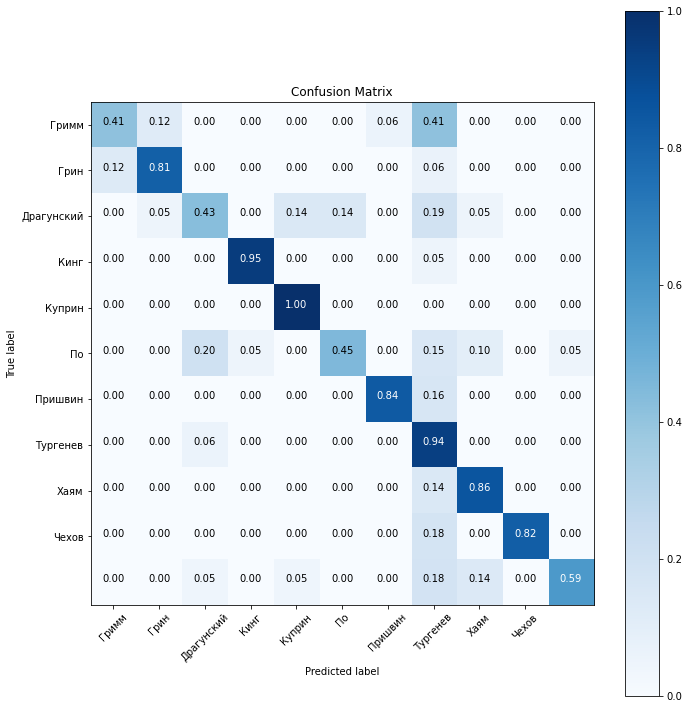

In [7]:
best_evaluate.model_test(obfuscation = False)

### DeepPavlov + Ruscorpora

1:02:13.904407
Д
р
а
П
а
п
О
д
н
Sound
Для текстов:
0.9566421122345012
Для предложений:
0.8186693187759727
Sensible
Для текстов:
36.59447004608295
Для предложений:
0.8761999337967561
Safe
0.21658986175115208
Normalized confusion matrix


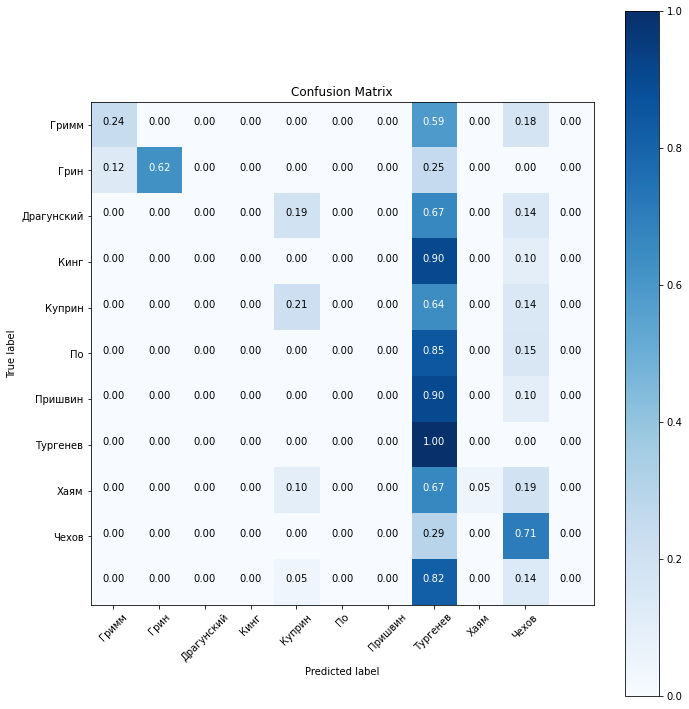

In [8]:
synonim_model_name = 'Ruscorpora'
syntax_model_name = 'deeppavlov'
syntax_algorithm = 'main_reverse'

languages = []

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name, syntax_algorithm)
clear_output()
start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

for obfuscated_text in obfuscated_texts[7]:
    print(obfuscated_text[0])
    print(obfuscated_text[1])
    print(obfuscated_text[2])
    
obfuscator.save_train_data(obfuscated_texts,"1")

best_evaluate.model_test(True, "1")

1:05:13.857572
р
а
а
п
н
т
Sound
Для текстов:
0.9640267879749533
Для предложений:
0.8247003456827816
Sensible
Для текстов:
37.617511520737324
Для предложений:
0.900695134061569
Safe
0.2488479262672811
Normalized confusion matrix


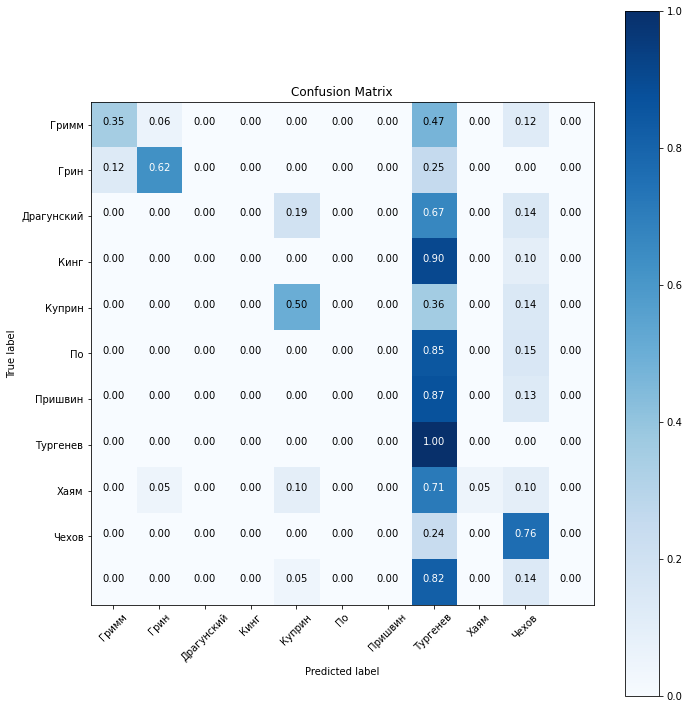

In [9]:
synonim_model_name = 'Ruscorpora'
syntax_model_name = 'deeppavlov'
syntax_algorithm = 'all_reverse'
languages = []

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name,syntax_algorithm)
clear_output()

start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

for obfuscated_text in obfuscated_texts[7]:
    print(obfuscated_text[1])
    print(obfuscated_text[2])
    
obfuscator.save_train_data(obfuscated_texts,"2")
best_evaluate.model_test(True, "2")

1:03:42.463823
р
а
а
п
д
н
Sound
Для текстов:
0.9564130155541567
Для предложений:
0.8167862347150937
Sensible
Для текстов:
36.68202764976959
Для предложений:
0.8782963698554562
Safe
0.21658986175115208
Normalized confusion matrix


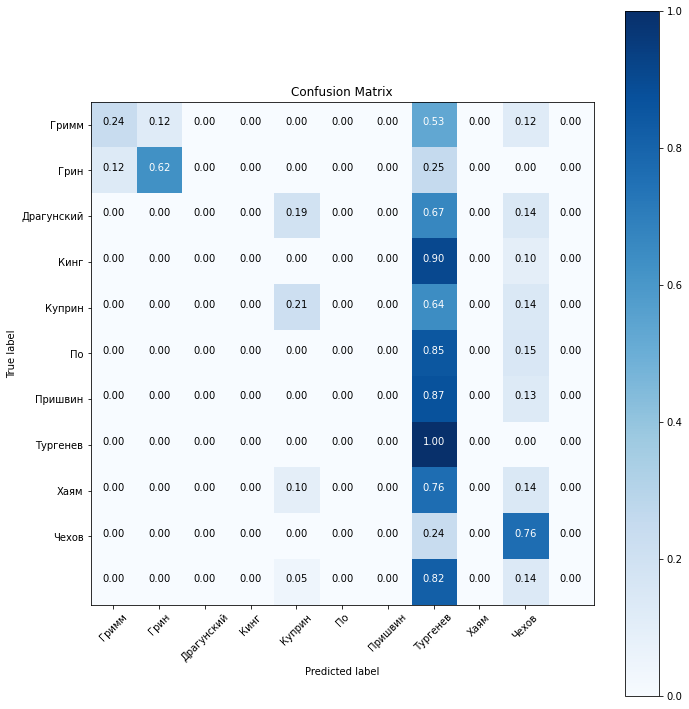

In [10]:
synonim_model_name = 'Ruscorpora'
syntax_model_name = 'deeppavlov'
syntax_algorithm = 'main_shuffle'
languages = []

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name,syntax_algorithm)
clear_output()

start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

for obfuscated_text in obfuscated_texts[7]:
    print(obfuscated_text[1])
    print(obfuscated_text[2])
    
obfuscator.save_train_data(obfuscated_texts,"3")
best_evaluate.model_test(True, "3")

1:09:24.427994
р
а
а
п
д
н
Sound
Для текстов:
0.9627634238040772
Для предложений:
0.8192218003779999
Sensible
Для текстов:
37.714285714285715
Для предложений:
0.9030122476001324
Safe
0.22580645161290322
Normalized confusion matrix


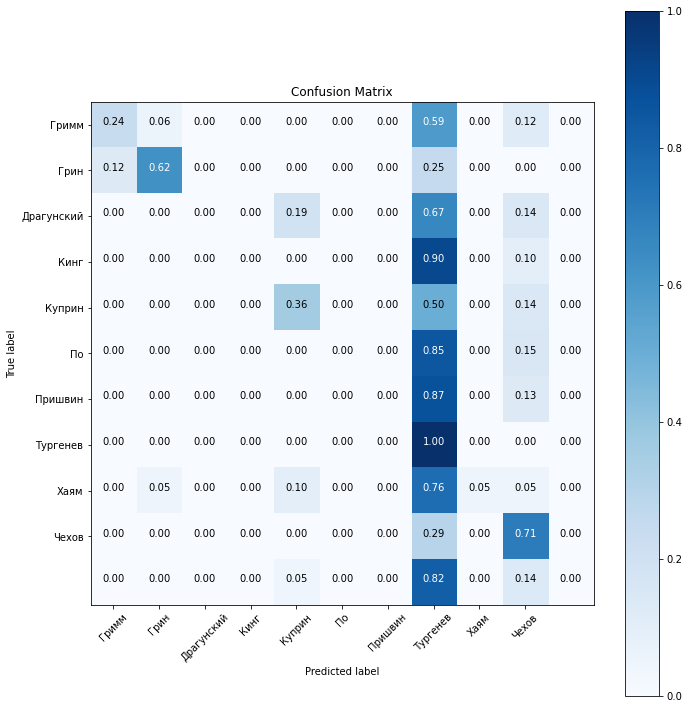

In [11]:
synonim_model_name = 'Ruscorpora'
syntax_model_name = 'deeppavlov'
syntax_algorithm = 'all_shuffle'
languages = []

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name,syntax_algorithm)
clear_output()

start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

for obfuscated_text in obfuscated_texts[7]:
    print(obfuscated_text[1])
    print(obfuscated_text[2])
    
obfuscator.save_train_data(obfuscated_texts,"4")
best_evaluate.model_test(True, "4")

### Natasha + Ruscorpora

0:21:22.581518
Д
р
а
П
а
п
О
д
н
Sound
Для текстов:
0.9488039181754269
Для предложений:
0.8212223446308818
Sensible
Для текстов:
34.6221198156682
Для предложений:
0.8289749531060355
Safe
0.21658986175115208
Normalized confusion matrix


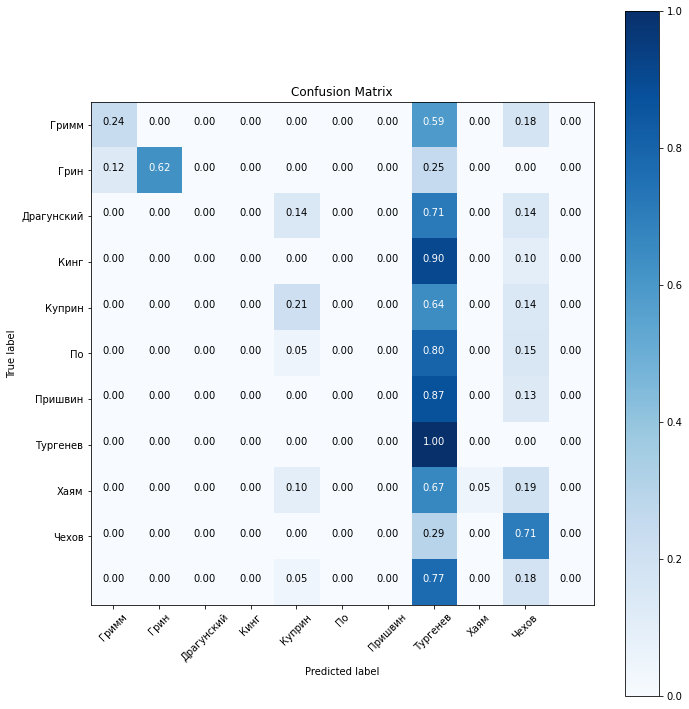

In [12]:
synonim_model_name = 'Ruscorpora'
syntax_model_name = 'natasha'
syntax_algorithm = 'main_reverse'

languages = []

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name, syntax_algorithm)
clear_output()
start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

for obfuscated_text in obfuscated_texts[7]:
    print(obfuscated_text[0])
    print(obfuscated_text[1])
    print(obfuscated_text[2])
    
obfuscator.save_train_data(obfuscated_texts,"5")

best_evaluate.model_test(True, "5")

0:21:40.392804
р
а
а
п
н
т
Sound
Для текстов:
0.9502349931732784
Для предложений:
0.825806298628276
Sensible
Для текстов:
35.37327188940092
Для предложений:
0.8469601677148847
Safe
0.23963133640552994
Normalized confusion matrix


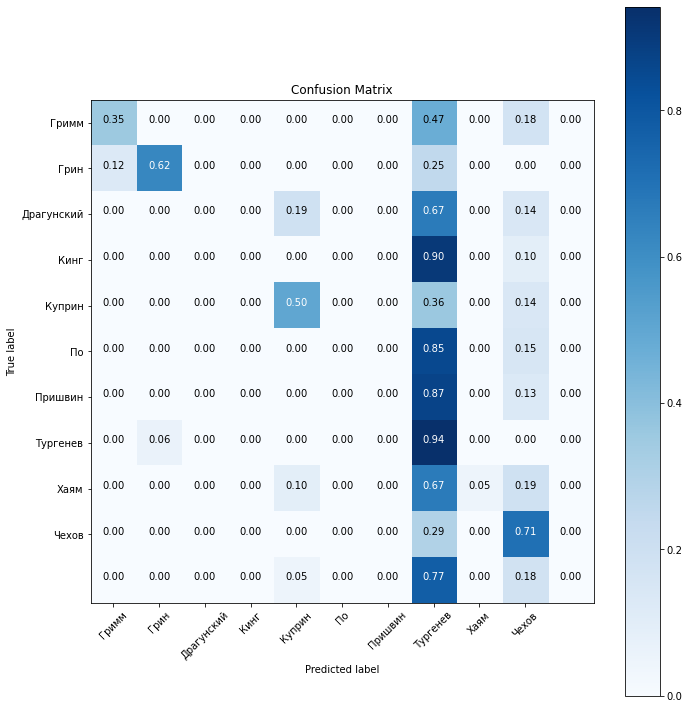

In [13]:
synonim_model_name = 'Ruscorpora'
syntax_model_name = 'natasha'
syntax_algorithm = 'all_reverse'
languages = []

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name,syntax_algorithm)
clear_output()

start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

for obfuscated_text in obfuscated_texts[7]:
    print(obfuscated_text[1])
    print(obfuscated_text[2])
    
obfuscator.save_train_data(obfuscated_texts,"6")
best_evaluate.model_test(True, "6")

0:21:20.954424
р
а
а
п
о
к
Sound
Для текстов:
0.9485410320603325
Для предложений:
0.8191972961071818
Sensible
Для текстов:
34.74654377880184
Для предложений:
0.8319540990841885
Safe
0.2119815668202765
Normalized confusion matrix


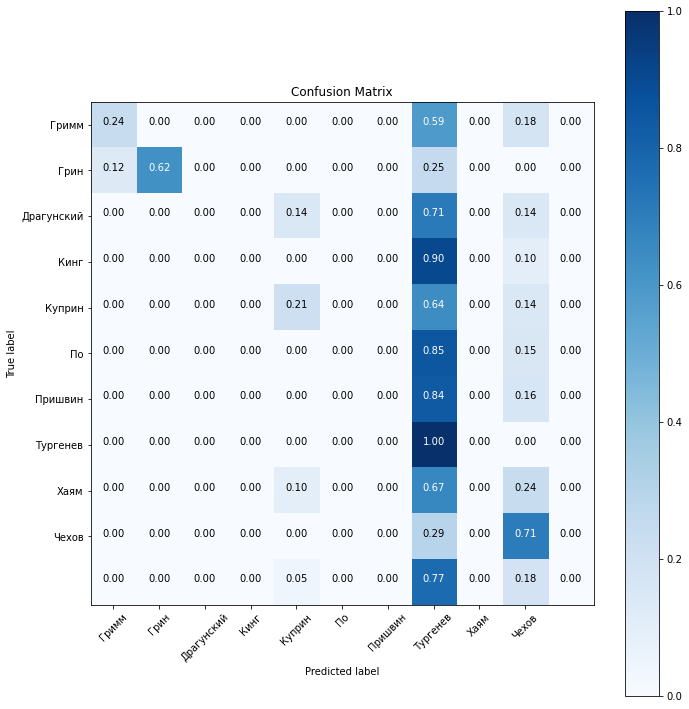

In [14]:
synonim_model_name = 'Ruscorpora'
syntax_model_name = 'natasha'
syntax_algorithm = 'main_shuffle'
languages = []

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name,syntax_algorithm)
clear_output()

start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

for obfuscated_text in obfuscated_texts[7]:
    print(obfuscated_text[1])
    print(obfuscated_text[2])
    
obfuscator.save_train_data(obfuscated_texts,"7")
best_evaluate.model_test(True, "7")

0:21:44.892704
р
а
а
п
д
н
Sound
Для текстов:
0.9492466069972029
Для предложений:
0.8205524199413382
Sensible
Для текстов:
35.49769585253456
Для предложений:
0.8499393136930377
Safe
0.21658986175115208
Normalized confusion matrix


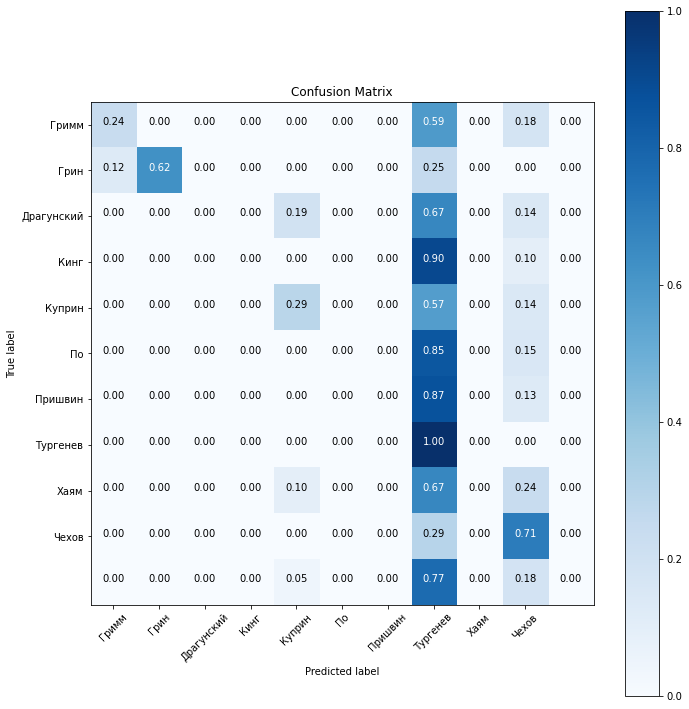

In [15]:
synonim_model_name = 'Ruscorpora'
syntax_model_name = 'natasha'
syntax_algorithm = 'all_shuffle'
languages = []

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name,syntax_algorithm)
clear_output()

start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

for obfuscated_text in obfuscated_texts[7]:
    print(obfuscated_text[1])
    print(obfuscated_text[2])
    
obfuscator.save_train_data(obfuscated_texts,"8")
best_evaluate.model_test(True, "8")

### Особые кобинации

#### Анализ использования Taiga и перевода

0:15:11.213194
р
а
а
п
а
п
Sound
Для текстов:
0.9599046772090672
Для предложений:
0.8389581810608514
Sensible
Для текстов:
56.672811059907836
Для предложений:
1.3049660441426145
Safe
0.30414746543778803
Normalized confusion matrix


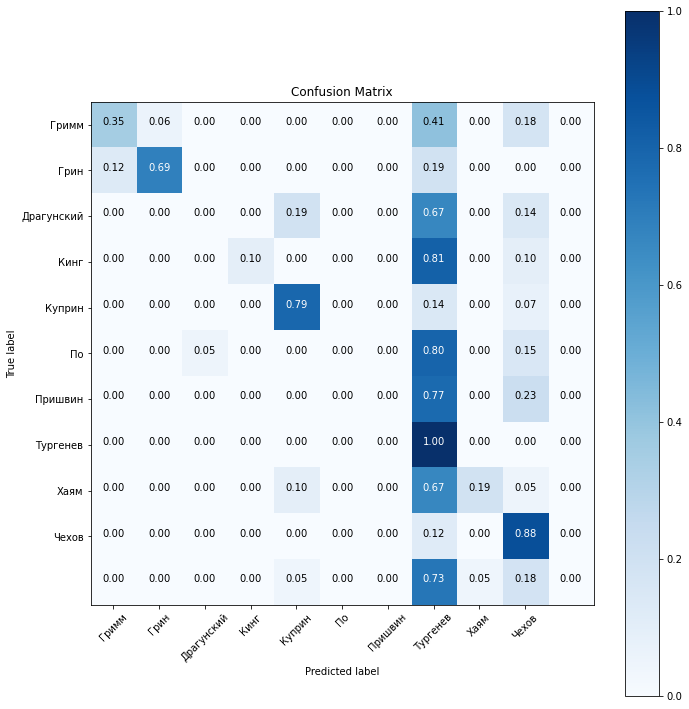

In [16]:
synonim_model_name = 'Taiga'
syntax_model_name = 'natasha'
syntax_algorithm = 'all_reverse'
languages = []

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name,syntax_algorithm)
clear_output()

start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

for obfuscated_text in obfuscated_texts[7]:
    print(obfuscated_text[1])
    print(obfuscated_text[2])
    
obfuscator.save_train_data(obfuscated_texts,"9")
best_evaluate.model_test(True, "9")

1:19:42.043175
р
а
а
п
а
п
Sound
Для текстов:
0.9067473271396291
Для предложений:
0.7649365445801555
Sensible
Для текстов:
45.663594470046085
Для предложений:
0.3595819573973945
Safe
0.17511520737327188
Normalized confusion matrix


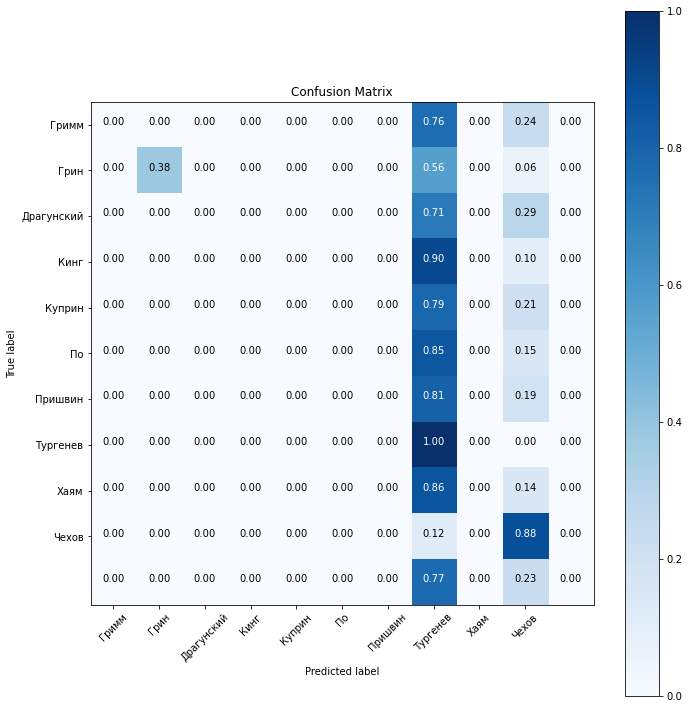

In [8]:
synonim_model_name = 'Taiga'
syntax_model_name = 'natasha'
syntax_algorithm = 'all_reverse'
languages = ['ru-de','de-ru']

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name,syntax_algorithm)
clear_output()

start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

for obfuscated_text in obfuscated_texts[7]:
    print(obfuscated_text[1])
    print(obfuscated_text[2])
    
obfuscator.save_train_data(obfuscated_texts,"10")
best_evaluate.model_test(True, "10")

#### Методы по отдельности

0:02:28.446420
р
а
а
п
а
п
Sound
Для текстов:
0.9685968338391286
Для предложений:
0.9112228200449477
Sensible
Для текстов:
25.56221198156682
Для предложений:
0.6120489904005296
Safe
0.3456221198156682
Normalized confusion matrix


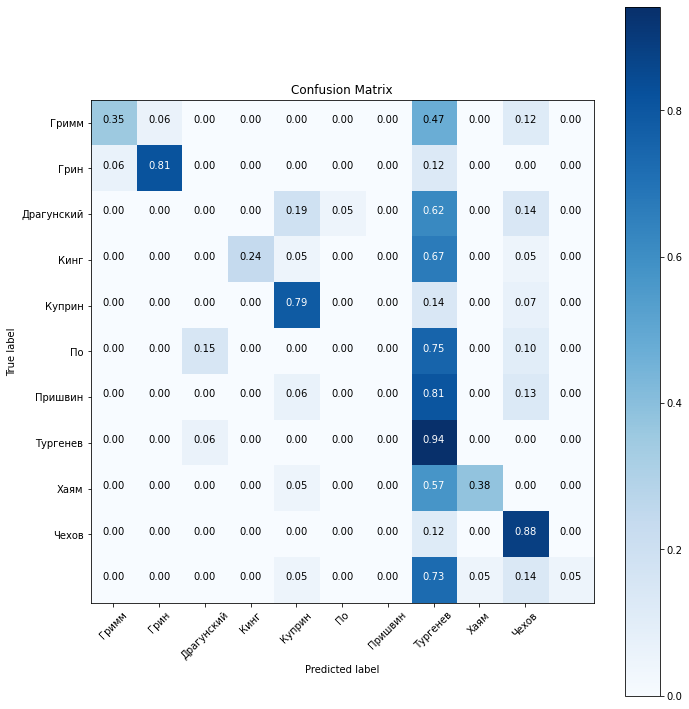

In [18]:
synonim_model_name = ''
syntax_model_name = 'natasha'
syntax_algorithm = 'all_reverse'
languages = []

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name,syntax_algorithm)
clear_output()

start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

for obfuscated_text in obfuscated_texts[7]:
    print(obfuscated_text[1])
    print(obfuscated_text[2])
    
obfuscator.save_train_data(obfuscated_texts,"11")
best_evaluate.model_test(True, "11")

0:21:13.951815
р
а
а
п
н
т
Sound
Для текстов:
0.9762926671442207
Для предложений:
0.8398905140183579
Sensible
Для текстов:
36.755760368663594
Для предложений:
0.8796735414139186
Safe
0.2350230414746544
Normalized confusion matrix


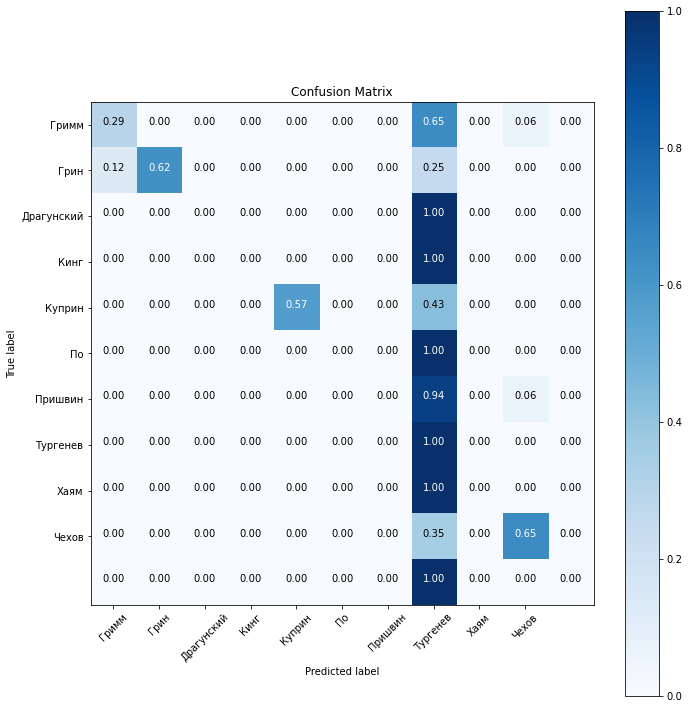

In [9]:
synonim_model_name = 'Ruscorpora'
syntax_model_name = ''
syntax_algorithm = ''
languages = []

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name,syntax_algorithm)
clear_output()

start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

for obfuscated_text in obfuscated_texts[7]:
    print(obfuscated_text[1])
    print(obfuscated_text[2])
    
obfuscator.save_train_data(obfuscated_texts,"12")
best_evaluate.model_test(True, "12")

0:22:17.912724
Sound
Для текстов:
0.9951556177031704
Для предложений:
0.9301032989656156
Sensible
Для текстов:
25.788018433179722
Для предложений:
0.6171831917944193
Safe
0.3317972350230415
Normalized confusion matrix


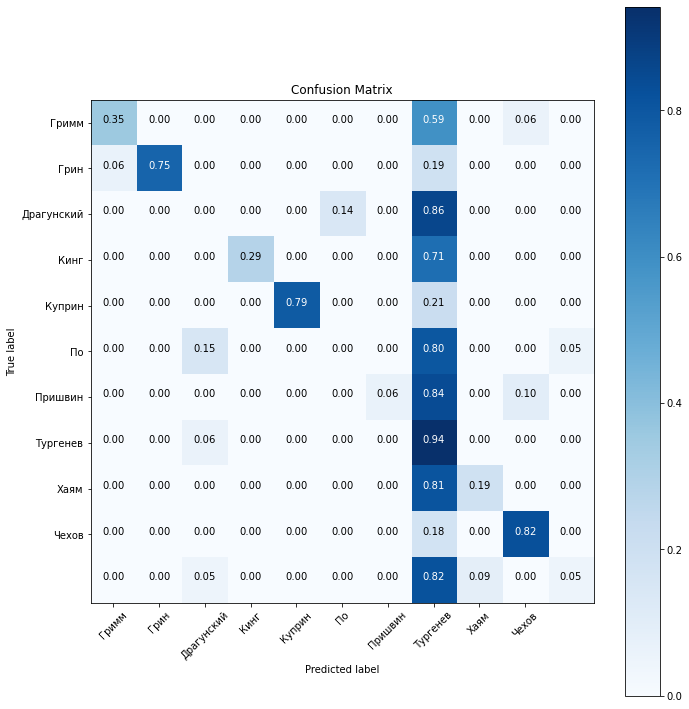

In [10]:
synonim_model_name = ''
syntax_model_name = ''
syntax_algorithm = ''
languages = ['ru-de','de-ru']

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name,syntax_algorithm)
clear_output()

start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

    
obfuscator.save_train_data(obfuscated_texts,"13")
best_evaluate.model_test(True, "13")

0:21:32.236054
Sound
Для текстов:
0.9951556177031704
Для предложений:
0.9301032989656156
Sensible
Для текстов:
25.788018433179722
Для предложений:
0.6171831917944193
Safe
0.3317972350230415
Normalized confusion matrix


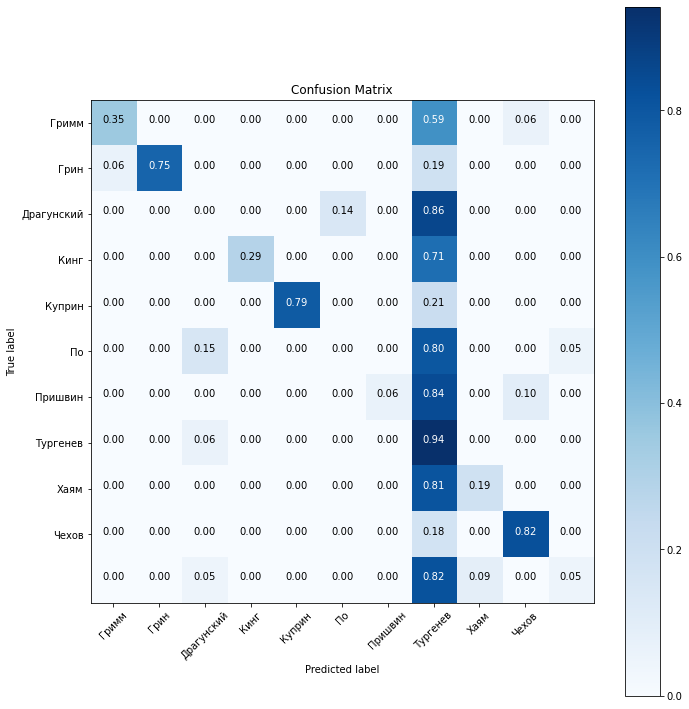

In [11]:
synonim_model_name = ''
syntax_model_name = ''
syntax_algorithm = ''
languages = ['ru-de','de-en','en-ru']

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name,syntax_algorithm)
clear_output()

start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

    
obfuscator.save_train_data(obfuscated_texts,"15")
best_evaluate.model_test(True, "15")

#### Все вместе

0:43:20.946148
Sound
Для текстов:
0.9349415193468364
Для предложений:
0.768594789790799
Sensible
Для текстов:
34.73271889400922
Для предложений:
0.2771261536198845
Safe
0.14746543778801843
Normalized confusion matrix


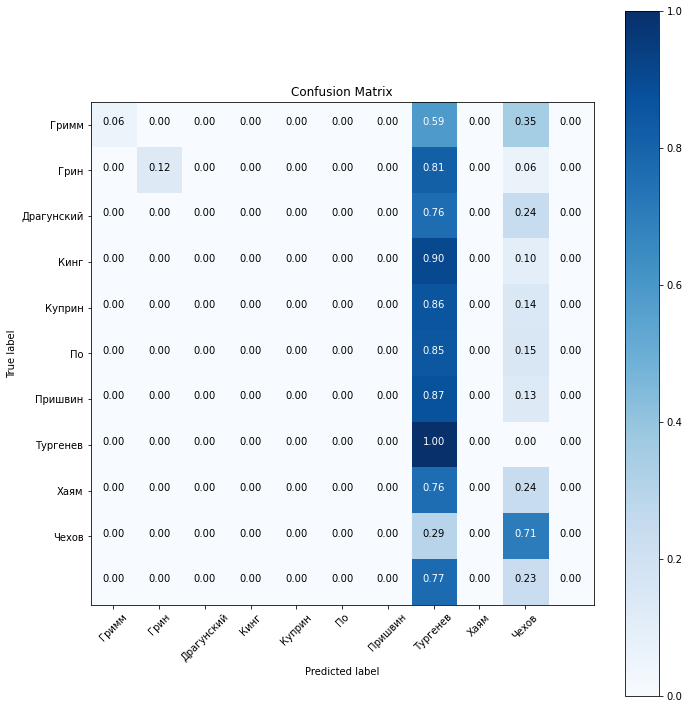

In [12]:
synonim_model_name = 'Ruscorpora'
syntax_model_name = 'natasha'
syntax_algorithm = 'main_shuffle'
languages = ['ru-de','de-ru']

obfuscator = Obfuscate(languages,synonim_model_name,syntax_model_name,syntax_algorithm)
clear_output()

start_time = datetime.now()
obfuscated_texts = []
iter_ = 1
for i, text in enumerate(to_obfuscate):
    print(iter_)
    obfuscated_texts.append([authors[i],text,obfuscator.Main_obfuscation(text)])
    iter_ = iter_ + 1
    clear_output()
print(datetime.now() - start_time)

    
obfuscator.save_train_data(obfuscated_texts,"14")
best_evaluate.model_test(True, "14")